In [1]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

def image_counter_from_path(path: str):
    data = []

    # Walk through each directory and sub-directory
    for root, dirs, files in os.walk(path):
        image_count = 0
        for file in files:
            # Check if file is an image
            try:
                with Image.open(os.path.join(root, file)) as img:
                    image_count += 1
            except (IOError, OSError):
                continue
        
        # Store folder name and image count
        if image_count > 0:
            folder_name = os.path.basename(root)
            data.append({'Folder': folder_name, 'Image Count': image_count})
    
    # Convert to DataFrame
    df = pd.DataFrame(data)
    return df

In [2]:
import os
import pandas as pd
from PIL import Image
from collections import defaultdict

def image_counter_from_paths(paths: dict):
    data = defaultdict(lambda: defaultdict(int))
    
    # Iterate over each path provided in the dictionary
    for key, path in paths.items():
        for root, dirs, files in os.walk(path):
            # Skip the root path, only count sub-folders
            if root == path:
                continue
            
            image_count = 0
            for file in files:
                try:
                    with Image.open(os.path.join(root, file)) as img:
                        image_count += 1
                except (IOError, OSError):
                    continue
            
            # Store image counts by sub-folder and key
            folder_name = os.path.relpath(root, path)  # Get relative sub-folder name
            data[folder_name][key] = image_count
    
    # Convert data to DataFrame
    df = pd.DataFrame(data).T.fillna(0).astype(int)
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'Folder'}, inplace=True)
    
    return df

In [22]:
sources = {
    "fish_functions": '/Volumes/T7_shield/CryptoVision/Data/fish_functions/training/Species_v02',
    "web": '/Volumes/T7_shield/CryptoVision/Data/web/Species_v01',
    "inatlist": '/Volumes/T7_shield/CryptoVision/Data/inaturalist/Species_v02',
}

df_counter = image_counter_from_paths(sources)

In [28]:
df_counter.head()

,Folder,fish_functions,web,inatlist
0,Apogonidae_Apogon_binotatus,70,124,41
1,Apogonidae_Apogon_maculatus,2,286,45
2,Apogonidae_Pristiapogon_kallopterus,66,44,36
3,Apogonidae_Cheilodipterus_quinquelineatus,33,0,36
4,Gobiidae_Eviota_zebrina,37,0,7


In [19]:
tot = df_counter['fish_functions'].sum() + df_counter['web'].sum() + df_counter['inatlist'].sum()

print(f"Total images: {tot}")
print(f"fish_functions: {df_counter['fish_functions'].sum()} - {df_counter['fish_functions'].sum() / tot * 100:.2f}%")
print(f"Web: {df_counter['web'].sum()} - {df_counter['web'].sum() / tot * 100:.2f}%")
print(f"iNaturalist: {df_counter['inatlist'].sum()} - {df_counter['inatlist'].sum() / tot * 100:.2f}%")

Total images: 19226
fish_functions: 7672 - 39.90%
Web: 8754 - 45.53%
iNaturalist: 2800 - 14.56%


In [29]:
df_counter['sum'] = df_counter['fish_functions'] + df_counter['web'] + df_counter['inatlist']

In [33]:
df_counter.describe()

,fish_functions,web,inatlist,sum
count,107.000000,107.000000,107.000000,107.000000
mean,71.700935,81.813084,26.168224,179.682243
std,77.250904,137.960216,17.891964,164.149012
min,0.000000,0.000000,0.000000,1.000000
25%,23.000000,0.000000,7.000000,62.500000
50%,50.000000,25.000000,32.000000,136.000000
75%,86.500000,81.000000,38.000000,235.000000
max,467.000000,766.000000,83.000000,854.000000


In [ ]:
df_counter.head()

In [31]:
df_counter['fish_functions'].mean()

71.37383177570094

In [25]:
def plot_stacked_image_count(df_counter, log_scale=False, figsize=(12, 8)):
    # Sort DataFrame alphabetically by Folder name
    df_sorted = df_counter.sort_values(by='Folder', ascending=True)
    
    # Calculate total image count for each folder
    total_counts = df_sorted.drop('Folder', axis=1).sum(axis=1)
    
    # Plotting
    plt.figure(figsize=figsize)
    ax = df_sorted.set_index('Folder').plot(kind='barh', stacked=True, ax=plt.gca(), logx=log_scale)

    # Highlight folder names in red if total count is below 50
    for i, (label, total) in enumerate(zip(ax.get_yticklabels(), total_counts)):
        if total < 50:
            label.set_color('red')

    # Add vertical lines for every 10 images
    max_count = total_counts.max()
    step = 10
    for x in range(0, int(max_count) + step, step):
        plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.5, alpha=0.4)

    # Set axis labels and title
    plt.xlabel('Number of Images (log scale)' if log_scale else 'Number of Images')
    plt.ylabel('Folder')
    plt.title('Stacked Image Count by Folder from Multiple Paths')
    plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.grid(axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

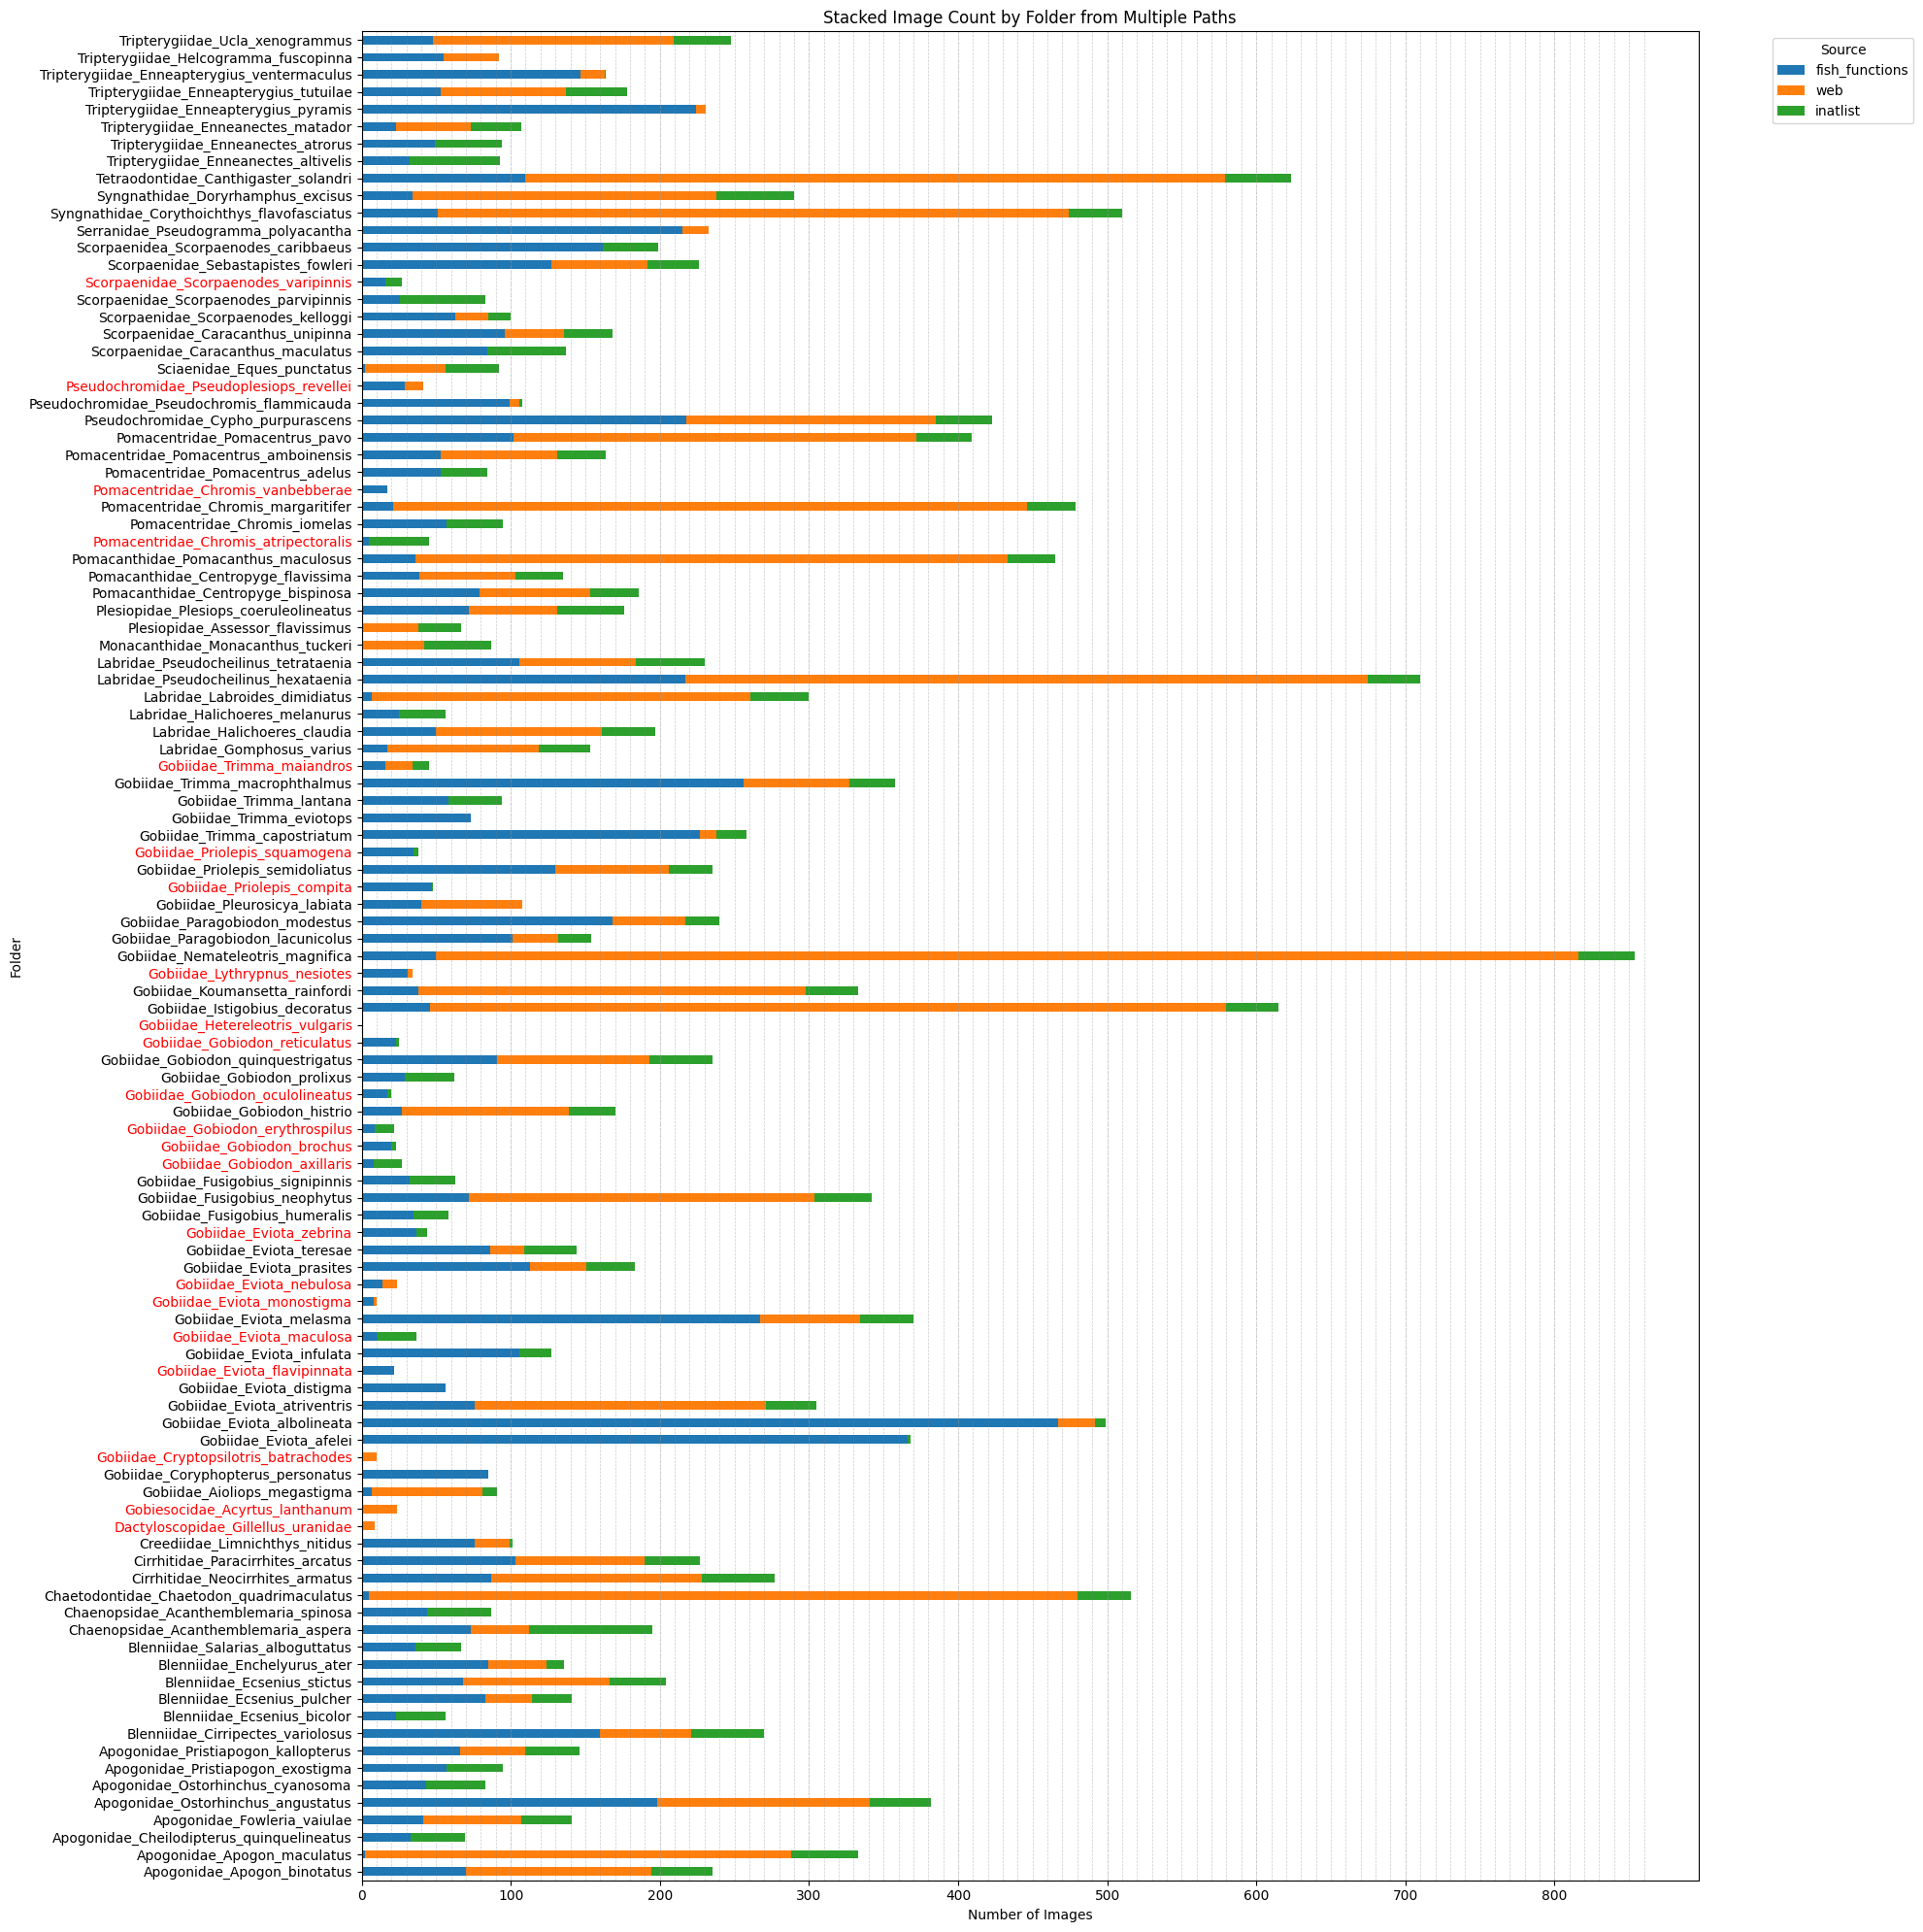

In [27]:
plot_stacked_image_count(df_counter, log_scale=False, figsize=(20, 20))

In [12]:
def list_compare(list1, list2):
    return {
        'list1 - list2':list(set(list1) - set(list2)),
        'list2 - list1':list(set(list2) - set(list1)),
    }

In [6]:
PATH

'/Volumes/T7_shield/CryptoVision/Data/fish&functions_lab/cryptovision_reviewed/Species'

In [8]:
species_list_ff = os.listdir(PATH)
species_list_web = os.listdir("/Volumes/T7_shield/CryptoVision/Data/web/species")

In [13]:
list_compare(species_list_web, species_list_ff)

{'list1 - list2': ['Gobiidae_Lythrypnus_nesiotes',
  'Pseudochromidae_Pseudoplesiops_revellei',
  'Gobiidae_Hetereleotris_vulgaris',
  'Gobiidae_Cryptopsilotris_batrachodes',
  'Plesiopidae_Assessor_flavissimus',
  'Dactyloscopidae_Gillellus_uranidae',
  'Gobiidae_Pleurosicya_labiata',
  'Monacanthidae_Monacanthus_tuckeri',
  'Gobiesocidae_Acyrtus_lanthanum'],
 'list2 - list1': ['Gobiidae_Priolepis_compita',
  'Gobiidae_Eviota_distigma',
  'Labridae_Halichoeres_melanurus',
  'Pomacentridae_Chromis_vanbebberae',
  'Gobiidae_Gobiodon_prolixus',
  'Scorpaenidae_Scorpaenodes_varipinnis',
  'Gobiidae_Trimma_lantana',
  'Gobiidae_Gobiodon_oculolineatus',
  'Blenniidae_Salarias_alboguttatus',
  'Scorpaenidae_Scorpaenodes_parvipinnis',
  'Gobiidae_Eviota_afelei',
  'Gobiidae_Fusigobius_signipinnis',
  'Gobiidae_Gobiodon_axillaris',
  'Gobiidae_Trimma_eviotops',
  'Pomacentridae_Chromis_atripectoralis',
  'Gobiidae_Eviota_maculosa',
  'Gobiidae_Gobiodon_reticulatus',
  'Gobiidae_Gobiodon_erythr

In [61]:
import os
from PIL import Image
import subprocess

def set_macos_tag(folder, tag):
    tag_mapping = {
        'red': 'Red',
        'orange': 'Orange',
        'green': 'Green',
        'purple': 'Purple'
    }
    
    tag_color = tag_mapping.get(tag)
    
    if tag_color:
        cmd = [
            'xattr', '-w', 
            'com.apple.metadata:_kMDItemUserTags',
            f'({tag_color})', 
            folder
        ]
        subprocess.run(cmd, check=True)

def count_images_and_tag_folders(path: str):
    # Walk through subdirectories only
    for root, dirs, files in os.walk(path):
        if root == path:  # Skip the root folder itself
            continue
        
        image_count = 0
        
        # Count image files in each sub-folder
        for file in files:
            try:
                with Image.open(os.path.join(root, file)) as img:
                    image_count += 1
            except (IOError, OSError):
                continue
        
        # Determine tag based on image count
        if image_count <= 9:
            tag = 'red'
        elif 10 <= image_count <= 24:
            tag = 'orange'
        elif 25 <= image_count <= 100:
            tag = 'green'
        else:
            tag = 'purple'
        
        # Set macOS Finder tag for the sub-folder
        set_macos_tag(root, tag)

# Example usage
# count_images_and_tag_folders('/path/to/images')

In [64]:
count_images_and_tag_folders('/Volumes/T7_shield/CryptoVision/Data/inaturalist/Species_v02')

In [11]:
import os
from PIL import Image

def rename_and_convert_images(input_path, suffix, quality=100):
    """
    Converts images to JPEG format (if necessary) and renames them according to the given pattern.
    
    Args:
    - input_path (str): Path to the main directory containing subfolders.
    - suffix (str): A suffix to add at the beginning of each renamed image.
    
    Example:
    If a subfolder is named "Family_Genus_species", the images inside it will be renamed to:
    "{suffix}_Genus_species_0001.jpg", "{suffix}_Genus_species_0002.jpg", etc.
    """
    # Iterate through each subfolder in the input path
    for subfolder in os.listdir(input_path):
        subfolder_path = os.path.join(input_path, subfolder)
        
        # Check if it's a directory
        if os.path.isdir(subfolder_path):
            # Extract genus and species from the subfolder name (assumes the format "Family_Genus_species")
            try:
                _, genus, species = subfolder.split('_')
            except ValueError:
                print(f"Skipping folder '{subfolder}': not in 'Family_Genus_species' format.")
                continue

            # Iterate through all files in the subfolder, excluding files that start with "."
            image_files = [
                f for f in os.listdir(subfolder_path) 
                if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')) and not f.startswith('.')
            ]
            image_files.sort()  # Sort files to ensure consistent numbering

            # Rename each image with the desired pattern and convert if necessary
            for idx, image_name in enumerate(image_files, start=1):
                # Pad the index with leading zeros (up to 4 digits)
                padded_idx = str(idx).zfill(4)
                
                # Define the new image name with .jpeg extension
                new_image_name = f"{suffix}_{genus}_{species}_{padded_idx}.jpeg"
                
                # Define the full paths for the old and new image names
                old_image_path = os.path.join(subfolder_path, image_name)
                new_image_path = os.path.join(subfolder_path, new_image_name)
                
                # Convert the image to .jpeg format if necessary
                try:
                    with Image.open(old_image_path) as img:
                        # Convert to RGB mode if the image has an alpha channel (like .png)
                        if img.mode in ("RGBA", "P"):
                            img = img.convert("RGB")
                        
                        # Save the image in .jpeg format with the new name (quality 100 for max)
                        img.save(new_image_path, "JPEG", quality=quality)
                        
                        # Remove the old file if the format changed
                        if old_image_path != new_image_path:
                            os.remove(old_image_path)
                    
                    print(f"Converted and renamed: {old_image_path} -> {new_image_path}")
                
                except Exception as e:
                    print(f"Error processing {old_image_path}: {e}")

    print("Renaming and conversion completed.")
    return True

In [16]:
rename_and_convert_images("/Volumes/T7_shield/CryptoVision/Data/fish_functions/training/Species_v02", 'lab', 80)

Converted and renamed: /Volumes/T7_shield/CryptoVision/Data/fish_functions/training/Species_v02/Apogonidae_Apogon_binotatus/lab_Apogon_binotatus_00001.jpg -> /Volumes/T7_shield/CryptoVision/Data/fish_functions/training/Species_v02/Apogonidae_Apogon_binotatus/lab_Apogon_binotatus_0001.jpeg
Converted and renamed: /Volumes/T7_shield/CryptoVision/Data/fish_functions/training/Species_v02/Apogonidae_Apogon_binotatus/lab_Apogon_binotatus_00002.jpg -> /Volumes/T7_shield/CryptoVision/Data/fish_functions/training/Species_v02/Apogonidae_Apogon_binotatus/lab_Apogon_binotatus_0002.jpeg
Converted and renamed: /Volumes/T7_shield/CryptoVision/Data/fish_functions/training/Species_v02/Apogonidae_Apogon_binotatus/lab_Apogon_binotatus_00003.jpg -> /Volumes/T7_shield/CryptoVision/Data/fish_functions/training/Species_v02/Apogonidae_Apogon_binotatus/lab_Apogon_binotatus_0003.jpeg
Converted and renamed: /Volumes/T7_shield/CryptoVision/Data/fish_functions/training/Species_v02/Apogonidae_Apogon_binotatus/lab_Ap

True